In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

df = pd.read_table('titanic.csv', sep = ',')

In [17]:
#wyświetl df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
#wyświelt podsumowanie df za pomocą describe. Co jest alarmujące?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
df.isna().sum()
# jest dużo braków w age
# cabin ma braki aż w 327 miejscach - więc to szum (bo to aż 80%ok)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [21]:
#wyrzuć z df te kolumny, które prawdopodobnie nic nie wnoszą
# //id, name, ticket, cabin, potem sib, parch?
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [22]:
#wyświetl df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [31]:
#użyj one-hot encoding na danych nominalnych
df = pd.get_dummies(df, prefix='is')
df = df.drop(["is_male", "is_C"], axis =1)

In [32]:
#wyświetl df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,is_Q,is_S
0,0,3,34.5,0,0,7.8292,False,True,False
1,1,3,47.0,1,0,7.0000,True,False,True
2,0,2,62.0,0,0,9.6875,False,True,False
3,0,3,27.0,0,0,8.6625,False,False,True
4,1,3,22.0,1,1,12.2875,True,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,False,False,True
414,1,1,39.0,0,0,108.9000,True,False,False
415,0,3,38.5,0,0,7.2500,False,False,True
416,0,3,NaN,0,0,8.0500,False,False,True


In [33]:
#usuń nadmiarowe kolumny - wyżej mam

In [34]:
#wyświetl df - wyżej mam

In [35]:
#wypełnij braki danych w kolumne Age za pomocą sredniej wartości z tej kolumny

mean_value = df["Age"].mean()
df = df.fillna(mean_value)

In [36]:
#skalujemy do wartości 0-1 tylko wybrane kolumny. W tej komórce nie musisz nic robić
cols_to_scale = ['Pclass','Age','Fare']

scaler = p.StandardScaler().fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [37]:
#wyświelt df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,is_Q,is_S
0,0,0.873482,0.334993,0,0,-0.498172,False,True,False
1,1,0.873482,1.325530,1,0,-0.513039,True,False,True
2,0,-0.315819,2.514175,0,0,-0.464854,False,True,False
3,0,0.873482,-0.259330,0,0,-0.483231,False,False,True
4,1,0.873482,-0.655545,1,1,-0.418237,True,False,True
...,...,...,...,...,...,...,...,...,...
413,0,0.873482,0.000000,0,0,-0.494213,False,False,True
414,1,-1.505120,0.691586,0,0,1.313968,True,False,False
415,0,0.873482,0.651965,0,0,-0.508557,False,False,True
416,0,0.873482,0.000000,0,0,-0.494213,False,False,True


In [39]:
#podział df na dane i labele 
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_female', 'is_Q', 'is_S']]
y = df[['Survived']]

In [50]:
#podziel X i y na zbiory uczące i testowe za pomocą train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [52]:
#zbuduj modej sieci. W tym przypadku ostatnia warstwa powinna mieć jeden neuron i sigmoidalną funkcję aktywacji
model = Sequential([
#       9 neuronów wejściowych
        Input(shape = (8,)),
#       wchodza na 8 kolejnych, a funkcja aktywacji relu oznacza że nie niebędzie wartości ujemnych. 
        Dense(8, activation = 'relu'),  
        Dense(1, activation = 'sigmoid')
])

In [53]:
#binary_crossentropy bo mamy tylko jeden neuron z sigmoidalną funkcją aktywacji
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [54]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#naucz sieć
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_test, y_test), callbacks = [es])

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 0.7807 - accuracy: 0.5210 - val_loss: 0.7570 - val_accuracy: 0.5119
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7681 - accuracy: 0.5449 - val_loss: 0.7468 - val_accuracy: 0.5238
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7567 - accuracy: 0.5599 - val_loss: 0.7378 - val_accuracy: 0.5476
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7466 - accuracy: 0.5539 - val_loss: 0.7296 - val_accuracy: 0.5595
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7375 - accuracy: 0.5838 - val_loss: 0.7217 - val_accuracy: 0.5595
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7285 - accuracy: 0.5838 - val_loss: 0.7147 - val_accuracy: 0.5714
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.5928 - val_loss: 0.7079 - val_accuracy: 0.5714
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.9970 - val_loss: 0.2440 - val_accuracy: 1.0000
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 1.0000
Epoch 61/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 1.0000 - val_loss: 0.2249 - val_accuracy: 1.0000
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 1.0000 - val_loss: 0.2160 - val_accuracy: 1.0000
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 1.0000 - val_loss: 0.2072 - val_accuracy: 1.0000
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2124 - accuracy: 1.0000 - val_loss: 0.1988 - val_accuracy: 1.0000
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 1.0000 - val_loss: 0.1907 - val_accuracy: 1.0000
Epoch 

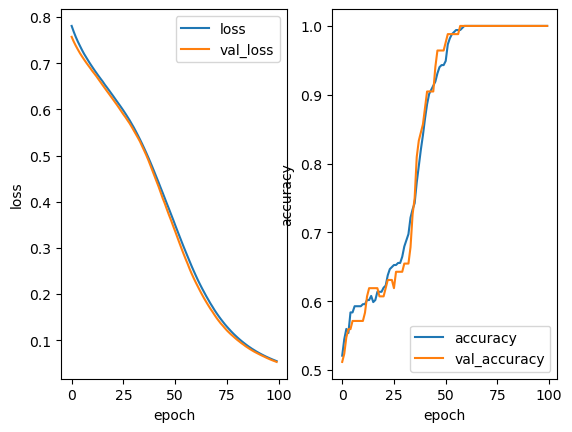

In [56]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()